In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os


# latency vs num bsm

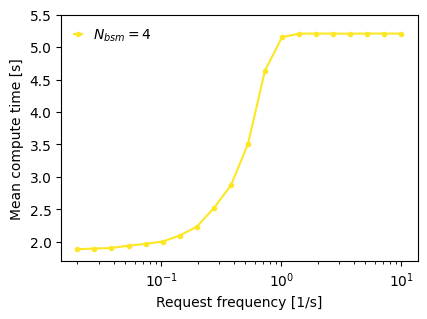

In [3]:
n = 6
num_ToR = 4
Nrep = 28
Niter = 100  # 25, 50, 100 number of repetions for ensemble averaging

comm_qs = 4
req_rate_list = np.logspace(-1.7,1.0,20)
num_tel_bsm_list = [4] #np.arange(4,15,2)

y_color = np.linspace(0,1,len(num_tel_bsm_list))
colors_bar = plt.cm.viridis_r(y_color)

plt.figure(figsize=(4.6,3.2))
for i_n, num_bsm_tel in enumerate(num_tel_bsm_list):

    compute_list = []
    wait_list = []
    for i_rep in range(Nrep):
        # fname = f"results/clos_multiten/q_N_{Niter}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_r_{i_rep}.json"
        fname = f"results/clos_multiten/q_N_{Niter}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_comm_{comm_qs}_r_{i_rep}.json"
        if os.path.exists(fname):
            with open(fname) as f:
                job_duration_wait_list = np.array(json.load(f))
                # print(job_duration_wait_list)
                compute_list.append(job_duration_wait_list[:,0].tolist())
                wait_list.append(job_duration_wait_list[:,1].tolist())
    # print(np.array(compute_list).shape)
    mean_compute_list = np.array(compute_list).mean(axis=0)
    mean_wait_list = np.array(wait_list).mean(axis=0)
    plt.plot(req_rate_list, mean_compute_list, ".-", color= colors_bar[i_n,:],label=rf"$N_{{bsm}}=${num_bsm_tel}")
    # plt.plot(req_rate_list, np.array(compute_list).T, ".-")
    # plt.plot(req_rate_list, mean_wait_list, ".-", color= colors_bar[i_n,:],label=rf"$N_{{bsm}}=${num_bsm_tel}")
    # plt.plot(req_rate_list, np.array(wait_list).T, ".-")
        # plt.errorbar(depth_vals_g, latency_avg_g,latency_std_g)#,label=rf"$N_q=${num_qubits}")

plt.ylabel("Mean compute time [s]")
plt.xlabel("Request frequency [1/s]")
plt.xscale("log")
# plt.yscale("log")
plt.ylim(1.7,5.5)
# plt.xlim(0,240)
plt.legend(handlelength=0.6, frameon=False)
plt.show()


num jobs: [ 5296  7785 10339 12791 15097 17563 20156 22652 24984 27705]
[ 5296  7785 10339 12791 15062 15049  9872  6084  3680  2268]


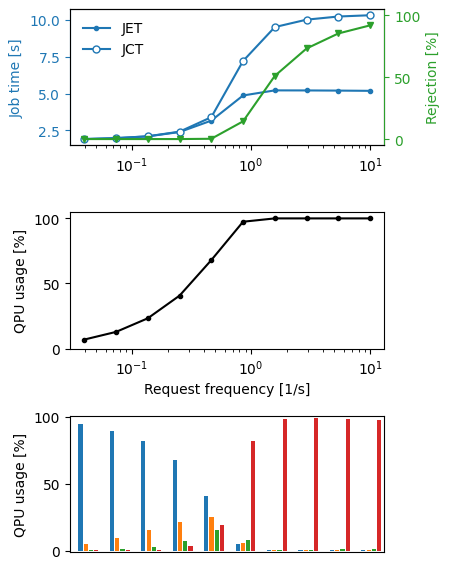

In [147]:
n = 6
num_ToR = 4
Nrep = 28 * 2 
Niter = 200  # 25, 50, 100 number of repetions for ensemble averaging

buffer = 4
comm_qs = 4
req_rate_list = np.logspace(-1.4,1.0,10)
num_tel_bsm_list = [4] #np.arange(4,15,2)

y_color = np.linspace(0,1,len(num_tel_bsm_list))
colors_bar = plt.cm.viridis_r(y_color)

fig, axs = plt.subplots(3,1, figsize=(4.6,5.8))
# plt.figure(figsize=(4.6,3.2))

for i_n, num_bsm_tel in enumerate(num_tel_bsm_list):

    exec_list = []
    comp_list = []
    rej_list = []
    qpu_usage_list = []
    for i_rep in range(Nrep):
        fname = f"results/clos_multiten/q_N_{Niter}_buff_{buffer}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_comm_{comm_qs}_r_{i_rep}.json"
        if os.path.exists(fname):
            with open(fname) as f:
                job_duration_wait_list = json.load(f)
                exec_list.append(job_duration_wait_list["exec"])
                comp_list.append(job_duration_wait_list["completion"])
                rej_list.append(job_duration_wait_list["reject"])
                qpu_usage_list.append(job_duration_wait_list["qpu_usage"])
    # print(np.array(compute_list).shape)
    exec_list = np.array(exec_list)
    mean_exec_list = exec_list[:,:,0].sum(axis=0)/exec_list[:,:,1].sum(axis=0)
    comp_list = np.array(comp_list)
    mean_comp_list = comp_list[:,:,0].sum(axis=0)/comp_list[:,:,1].sum(axis=0)
    rej_list = np.array(rej_list)
    mean_rej_list = rej_list[:,:,1].sum(axis=0)/rej_list[:,:,0].sum(axis=0)
    qpu_usage_list = np.array(qpu_usage_list)
    mean_usage_list = qpu_usage_list.mean(axis=0)

    print("num jobs:", rej_list[:,:,0].sum(axis=0))
    print(rej_list[:,:,0].sum(axis=0)-rej_list[:,:,1].sum(axis=0))
    # mean_comp_list = np.array(comp_list).mean(axis=0)
    # plt.plot(req_rate_list, mean_exec_list, ".-", color= colors_bar[i_n,:],label=rf"$N_{{bsm}}=${num_bsm_tel}")
    # plt.plot(req_rate_list, mean_comp_list, "v-", color= colors_bar[i_n,:],label=rf"$N_{{bsm}}=${num_bsm_tel}")
    # plt.subplot(3,1,1)
    # plt.xlim(0.01,20)

    # plt.subplot(3,1,2)
    color1 = "C0"
    axs[0].plot(req_rate_list, mean_exec_list, ".-",color=color1, label="JET")
    axs[0].plot(req_rate_list, mean_comp_list, "o-",color=color1, markerfacecolor="white",markersize=5, label="JCT")
    axs[0].set_ylabel("Job time [s]")
    # axs[0].set_xlabel("Request frequency [1/s]")
    axs[0].set_xscale("log")
    axs[0].legend(frameon=False)
    axs[0].tick_params(axis='y', colors=color1)
    axs[0].spines['left'].set_color(color1)
    axs[0].yaxis.label.set_color(color1)
    axs[0].tick_params(axis='y', colors=color1)

    ax2 = axs[0].twinx()
    color2 = 'C2'
    ax2.set_ylabel("Rejection [%]", color=color2)
    ax2.plot(req_rate_list, 100*mean_rej_list, "v-", markersize=4, color=color2)
    # axs[0].plot(req_rate_list, 100*mean_rej_list, ".-", label=rf"$N_{{bsm}}=${num_bsm_tel}")
    ax2.set_xscale("log")
    ax2.set_ylim(-5,105)
    # axs[0].set_ylabel()
    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.spines['right'].set_color(color2)
    ax2.yaxis.label.set_color(color2)
    ax2.tick_params(axis='y', colors=color2)

    # plt.subplot(3,1,3)
    Nmax = 6
    delta = 1
    # for i_req, req_rate in enumerate(req_rate_list):
    axs[1].plot(req_rate_list, 100*(1 - mean_usage_list[:,0]),"k.-")
        # for qpu in range(num_ToR+1):
        #     axs[1].bar(Nmax*i_req + qpu, 100*mean_usage_list[i_req,qpu],color=f"C{qpu}")
    axs[1].set_xscale("log")
    # axs[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    axs[1].set_ylabel("QPU usage [%]")
    # axs[1].set_xlim(-delta, Nmax*(len(req_rate_list)-1)+num_ToR+delta)
    # axs[1].set_ylim(-1,101)
    axs[1].set_xlabel("Request frequency [1/s]")
    axs[1].set_yticks([0,50,100])

    ax = axs[2]
    for i_req, req_rate in enumerate(req_rate_list):
        for qpu in range(1,num_ToR+1):
            # axs[1].bar(Nmax*i_req + qpu, 100*mean_usage_list[i_req,qpu],color=f"C{qpu}")
            ax.bar(Nmax*i_req + qpu, 100*mean_usage_list[i_req,qpu]/sum(mean_usage_list[i_req,1:]),color=f"C{qpu-1}")
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.set_ylabel("QPU usage [%]")
    ax.set_xlim(-delta, Nmax*(len(req_rate_list)-1)+num_ToR+delta)
    ax.set_ylim(-1,101)
# plt.yscale("log")
# plt.ylim(1.7,5.5)
# plt.xlim(0.01,20)
# axs[0].legend(handlelength=0.6, frameon=False)
plt.tight_layout()
plt.savefig("figures/multiten_rack.pdf", transparent=True)
plt.show()


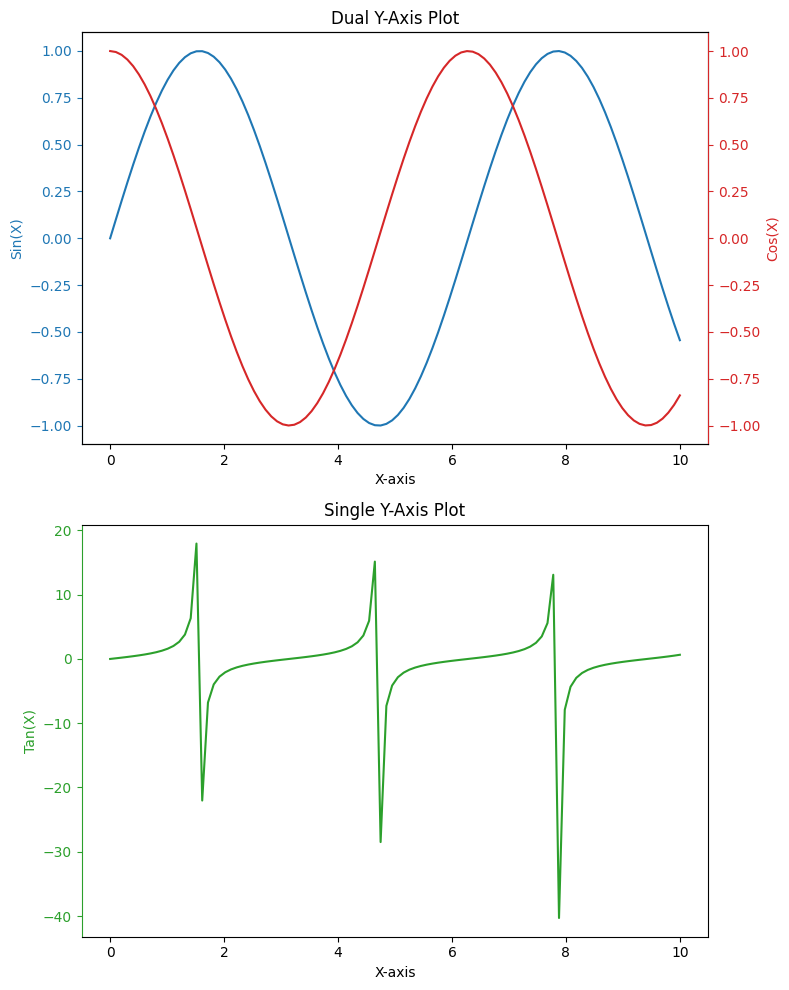

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)  # Data for the second subplot

# Create the figure and the subplots
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(8, 10))

# First subplot: dual y-axis plot
color1 = 'tab:blue'
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Sin(X)', color=color1)
ax1.plot(x, y1, color=color1)

# Set the color of the left y-axis (including the spine, label, tick labels)
ax1.spines['left'].set_color(color1)
ax1.yaxis.label.set_color(color1)
ax1.tick_params(axis='y', colors=color1)

# Also, set the color of the left axis spine directly (redundancy for compatibility)
ax1.spines['left'].set_edgecolor(color1)

# Second y-axis for the first subplot
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Cos(X)', color=color2)
ax2.plot(x, y2, color=color2)

# Set the color of the right y-axis (including the spine, label, tick labels)
ax2.spines['right'].set_color(color2)
ax2.yaxis.label.set_color(color2)
ax2.tick_params(axis='y', colors=color2)

# Set the color of the right axis spine directly (redundancy for compatibility)
ax2.spines['right'].set_edgecolor(color2)

# Second subplot: single axis plot
ax3.set_xlabel('X-axis')
ax3.set_ylabel('Tan(X)', color='tab:green')
ax3.plot(x, y3, color='tab:green')

# Set the color of the left y-axis for the second subplot
ax3.spines['left'].set_color('tab:green')
ax3.yaxis.label.set_color('tab:green')
ax3.tick_params(axis='y', colors='tab:green')

# Also, set the color of the left axis spine directly (redundancy for compatibility)
ax3.spines['left'].set_edgecolor('tab:green')

# Set titles for subplots
ax1.set_title('Dual Y-Axis Plot')
ax3.set_title('Single Y-Axis Plot')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


# vs num ToR

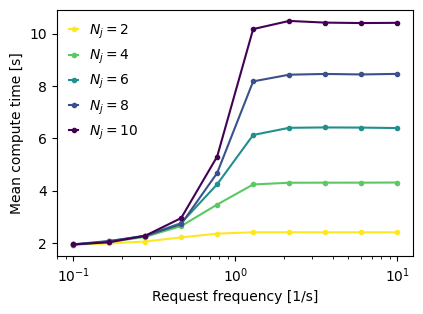

In [52]:
n = 4
num_ToR = 4
num_bsm_tel = 2
Nrep = 28
Niter = 50  # 25, 50, 100 number of repetions for ensemble averaging

req_rate_list = np.logspace(-1,1,10)
num_ToR_list = np.arange(2,11,2)

y_color = np.linspace(0,1,len(num_ToR_list))
colors_bar = plt.cm.viridis_r(y_color)

plt.figure(figsize=(4.6,3.2))
for i_n, num_ToR in enumerate(num_ToR_list):

    compute_list = []
    wait_list = []
    for i_rep in range(Nrep):
        fname = f"results/clos_multiten/q_N_{Niter}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_r_{i_rep}.json"
        # fname = f"results/clos_multiten/q_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_r_{i_rep}.json"
        if os.path.exists(fname):
            with open(fname) as f:
                job_duration_wait_list = np.array(json.load(f))
                compute_list.append(job_duration_wait_list[:,0].tolist())
                wait_list.append(job_duration_wait_list[:,1].tolist())
    # print(np.array(compute_list).shape)
    mean_compute_list = np.array(compute_list).mean(axis=0)
    mean_wait_list = np.array(wait_list).mean(axis=0)
    plt.plot(req_rate_list, mean_compute_list, ".-", color= colors_bar[i_n,:],label=rf"$N_j=${num_ToR}")
    # plt.plot(req_rate_list, np.array(compute_list).T, ".-")
    # plt.plot(req_rate_list, mean_wait_list, ".-", color= colors_bar[i_n,:],label=rf"$N_j=${num_ToR}")
    # plt.plot(req_rate_list, np.array(wait_list).T, ".-")
        # plt.errorbar(depth_vals_g, latency_avg_g,latency_std_g)#,label=rf"$N_q=${num_qubits}")
        # plt.plot(depth_avg_list, latency_avg_list, "k.-",label=rf"$N_q=${num_qubits}")

plt.ylabel("Mean compute time [s]")
plt.xlabel("Request frequency [1/s]")
plt.xscale("log")
# plt.yscale("log")
# plt.ylim(0,22)
# plt.xlim(0,240)
plt.legend(handlelength=0.6, frameon=False)
# plt.title("new algo")
plt.show()


# multitenancy qpu

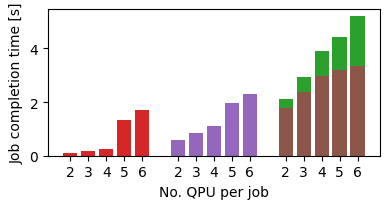

In [56]:
n = 6
num_ToR = 4
Nrep = 28
Niter = 100  # 25, 50, 100 number of repetions for ensemble averaging
buffer = 4

comm_qs = 4
req_rate_list = 10**np.array([-1.0,0.0,1.0]) #np.logspace(-2,1.0,10)
# req_rate_list = [10]
num_tel_bsm_list = [4] #np.arange(2,15,2)
qpu_vals = [2,3,4,5,6]

y_color = np.linspace(0,1,len(num_tel_bsm_list))
colors_bar = plt.cm.viridis_r(y_color)

fig, ax = plt.subplots(figsize=(4,2.2))
# plt.figure(figsize=(4.6,3.2))
for i_n, num_bsm_tel in enumerate(num_tel_bsm_list):

    counter = 0
    exec_list = []
    comp_list = []
    for i_req in range(len(req_rate_list)):
        comp_dict = {}
        exec_dict = {}
        for qpu in qpu_vals:
            exec_dict[f"{qpu}"] = []
            comp_dict[f"{qpu}"] = []
        exec_list.append(exec_dict)
        comp_list.append(comp_dict)

    for i_rep in range(Nrep):
        # fname = f"results/clos_multiten/q_N_{Niter}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_r_{i_rep}.json"
        # fname = f"results/clos_multiten_qpu/q_N_{Niter}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_comm_{comm_qs}_r_{i_rep}.json"
        fname = f"q_N_{Niter}_buff_{buffer}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_comm_{comm_qs}_r_{i_rep}.json"
        fname = "results/clos_multiten_qpu/" + fname
        if os.path.exists(fname):
            with open(fname) as f:
                job_list = json.load(f)
                job_exec_time_list = job_list["exec"]
                job_completion_time_list = job_list["completion"]                
                # print("exec: ", job_exec_time_list)
                # print("comp: ", job_completion_time_list)

                for i_req, req_rate in enumerate(req_rate_list):
                    for qpu in job_exec_time_list[i_req].keys():
                        exec_list[i_req][qpu].append(job_exec_time_list[i_req][qpu])
                        comp_list[i_req][qpu].append(job_completion_time_list[i_req][qpu])

    for i_req, req_rate in enumerate(req_rate_list):
        exec_times_plot = []
        comp_times_plot = []
        qpu_vals_plot = []
        for qpu in exec_list[i_req].keys():
            exec_times_plot.append(sum(exec_list[i_req][qpu])/len(exec_list[i_req][qpu]))
            comp_times_plot.append(sum(comp_list[i_req][qpu])/len(comp_list[i_req][qpu]))
            qpu_vals_plot.append(int(qpu))

        # print("exec: ", exec_times_plot)
        # print("comp: ", comp_times_plot)

        # plt.figure()
        plt.bar(6*i_req + np.array(qpu_vals_plot),comp_times_plot,color=f"C{i_req}")
        # if i_req == 2:
        plt.bar(6*i_req + np.array(qpu_vals_plot),exec_times_plot,color=f"C{i_req+3}")
        # else:
        #     plt.bar(6*i_req + np.array(qpu_vals_plot),exec_times_plot,color=f"C{i_req}")

        # plt.show()
    # print(np.array(compute_list).shape)
    # mean_compute_list = np.array(compute_list).mean(axis=0)
    # mean_wait_list = np.array(wait_list).mean(axis=0)
    # plt.plot(req_rate_list, mean_compute_list, ".-", color= colors_bar[i_n,:],label=rf"$N_{{bsm}}=${num_bsm_tel}")
    # plt.plot(req_rate_list, np.array(compute_list).T, ".-")
    # plt.plot(req_rate_list, mean_wait_list, ".-", color= colors_bar[i_n,:],label=rf"$N_{{bsm}}=${num_bsm_tel}")
    # plt.plot(req_rate_list, np.array(wait_list).T, ".-")
        # plt.errorbar(depth_vals_g, latency_avg_g,latency_std_g)#,label=rf"$N_q=${num_qubits}")

plt.xticks(list(range(2,7))+list(range(8,13))+list(range(14,19)))

# labels = [item.get_text() for item in ax.get_xticklabels()]
# labels[1] = 'Testing'
labels = list(range(2,7))+list(range(2,7))+list(range(2,7))

ax.set_xticklabels(labels)

# plt.xtickslabel(list(range(2,7))+list(range(2,7))+list(range(2,7)))
# print(compute_list)
# plt.ylabel("Mean compute time [s]")
# plt.xlabel("Request frequency [1/s]")
# plt.xscale("log")
# # plt.yscale("log")
# plt.ylim(0,4)
# # plt.xlim(0,240)
# plt.legend(handlelength=0.6, frameon=False)
# # plt.title("new algo")
plt.xlabel("No. QPU per job")
plt.ylabel("Job completion time [s]")
plt.tight_layout()
# plt.savefig("figures/multiten_vs_qpu_buff_n6.pdf")
plt.show()


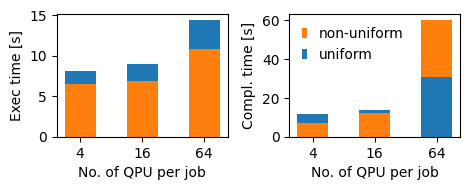

In [2]:
n = 8
num_ToR = 8
Nrep = 28
# Niter = 5  # 25, 50, 100 number of repetions for ensemble averaging
num_bsm_tel = 4
buffer = 4


comm_qs = 4
# req_rate_list = np.logspace(-2,1.0,10)
num_tel_bsm_list = [4] #np.arange(2,15,2)
qpu_vals = [4,16,64]

# y_color = np.linspace(0,1,len(num_tel_bsm_list))
# colors_bar = plt.cm.viridis_r(y_color)

# for i_n, num_bsm_tel in enumerate(num_tel_bsm_list):
uniform = [0,1]
labels = ["uniform", "non-uniform"]
exec_times_plot = {"uniform":[],"non-uniform":[]}
comp_times_plot = {"uniform":[],"non-uniform":[]}

for i_n in [1,0]:
    counter = 0
    exec_dict = {}
    comp_dict = {}
    for qpu in qpu_vals:
        exec_dict[f"{qpu}"] = []
        comp_dict[f"{qpu}"] = []

    for i_rep in range(Nrep):
        if i_n == 0:
            Niter = 10  
            fname = f"results/clos_multiten_rates_qpu/q_uniform_N_{Niter}_buff_{buffer}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_comm_{comm_qs}_r_{i_rep}.json"
        else:
            Niter = 20  
            fname = f"results/clos_multiten_rates_qpu/q_N_{Niter}_buff_{buffer}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_comm_{comm_qs}_r_{i_rep}.json"
        if os.path.exists(fname):
            with open(fname) as f:
                job_list = json.load(f)
                job_exec_time_list = job_list["exec"]
                job_completion_time_list = job_list["completion"]                

                # print(job_duration_list)
                for qpu in job_exec_time_list.keys():
                    exec_dict[qpu].append(job_exec_time_list[qpu])
                    comp_dict[qpu].append(job_completion_time_list[qpu])

    qpu_vals_plot = []
    for qpu in exec_dict.keys():
        exec_times_plot[labels[i_n]].append(sum(exec_dict[qpu])/len(exec_dict[qpu]))
        comp_times_plot[labels[i_n]].append(sum(comp_dict[qpu])/len(comp_dict[qpu]))
        qpu_vals_plot.append(int(qpu))

    # widths = np.diff(qpu_vals_plot + [qpu_vals_plot[-1] * 2])
    # plt.bar(qpu_vals_plot,qpu_times_plot, width=4)#, align='edge', facecolor='dodgerblue', edgecolor='white', lw=2)
    # plt.bar(x, height, widths, align='edge', facecolor='dodgerblue', edgecolor='white', lw=2)
    # # plt.bar(x_plot,comp_times_plot,label=labels[i_n], width=0.5,alpha=0.5)#, align='edge', facecolor='dodgerblue', edgecolor='white', lw=2)

x_plot = range(len(qpu_vals_plot))
def plotter(ax,quantity, freq, dlist, draw_legend= False):
    for i, i_n in enumerate(dlist):
        y_plot = quantity[labels[i_n]]
        if draw_legend:
            ax.bar(x_plot[freq],y_plot[freq],label=labels[i_n],color=f"C{i_n}", width=0.5)#, align='edge', facecolor='dodgerblue', edgecolor='white', lw=2)
        else:
            ax.bar(x_plot[freq],y_plot[freq], color=f"C{i_n}", width=0.5)#, align='edge', facecolor='dodgerblue', edgecolor='white', lw=2)

figs, axs = plt.subplots(1,2, figsize=(4.8,2))
# plt.figure(figsize=(4.6,3.2))
labels_plot = qpu_vals_plot
quantity = exec_times_plot
for freq in range(3):
        dlist = [0,1]
        plotter(axs[0],quantity,freq,dlist)

axs[0].set_xticks(x_plot)
axs[0].set_xticklabels(labels_plot)
axs[0].set_xlabel("No. of QPU per job")
axs[0].set_ylabel("Exec time [s]")

quantity = comp_times_plot
for freq in range(3):
    if freq < 2:
        dlist = [0,1]
        plotter(axs[1],quantity,freq,dlist)
    else:
        dlist = [1,0]
        plotter(axs[1],quantity,freq,dlist, True)
axs[1].legend(frameon=False, handlelength=0.4)
axs[1].set_xticks(x_plot)
axs[1].set_xticklabels(labels_plot)
axs[1].set_xlabel("No. of QPU per job")
axs[1].set_ylabel("Compl. time [s]")


        # plt.show()
    # print(np.array(compute_list).shape)
    # mean_compute_list = np.array(compute_list).mean(axis=0)
    # mean_wait_list = np.array(wait_list).mean(axis=0)
    # plt.plot(req_rate_list, mean_compute_list, ".-", color= colors_bar[i_n,:],label=rf"$N_{{bsm}}=${num_bsm_tel}")
    # plt.plot(req_rate_list, np.array(compute_list).T, ".-")
    # plt.plot(req_rate_list, mean_wait_list, ".-", color= colors_bar[i_n,:],label=rf"$N_{{bsm}}=${num_bsm_tel}")
    # plt.plot(req_rate_list, np.array(wait_list).T, ".-")
        # plt.errorbar(depth_vals_g, latency_avg_g,latency_std_g)#,label=rf"$N_q=${num_qubits}")


# # labels = [item.get_text() for item in ax.get_xticklabels()]
# # labels[1] = 'Testing'
# labels = qpu_vals_plot
# plt.legend(frameon=False)

plt.tight_layout()
plt.savefig("figures/multiten_small_large_combined.pdf")
plt.show()


In [90]:
comp_times_plot


{'uniform': [11.558311731675255, 13.608874766453642, 30.59719614649081],
 'non-uniform': [6.904179112655368, 12.173768565465462, 64.27444788618655]}

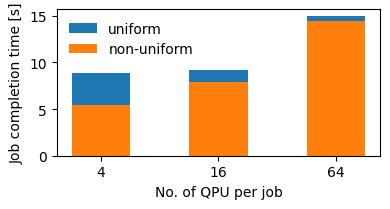

In [63]:
# new scheme with buffer
n = 8
num_ToR = 8
Nrep = 28
# Niter = 5  # 25, 50, 100 number of repetions for ensemble averaging
num_bsm_tel = 4

comm_qs = 4
# req_rate_list = np.logspace(-2,1.0,10)
num_tel_bsm_list = [4] #np.arange(2,15,2)
qpu_vals = [4,16,64]

# y_color = np.linspace(0,1,len(num_tel_bsm_list))
# colors_bar = plt.cm.viridis_r(y_color)

fig, ax = plt.subplots(figsize=(4,2.2))
# plt.figure(figsize=(4.6,3.2))
# for i_n, num_bsm_tel in enumerate(num_tel_bsm_list):
uniform = [0,1]
labels = ["uniform", "non-uniform"]
for i_n in uniform:
    counter = 0
    compute_dict = {}
    for qpu in qpu_vals:
        compute_dict[f"{qpu}"] = []

    for i_rep in range(Nrep):
        if i_n == 0:
            Niter = 10  
            fname = f"results/clos_multiten_rates_qpu/q_uniform_N_{Niter}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_comm_{comm_qs}_r_{i_rep}.json"
        else:
            Niter = 5  
            fname = f"results/clos_multiten_rates_qpu/q_N_{Niter}_n_{n}_tor_{num_ToR}_tel_{num_bsm_tel}_comm_{comm_qs}_r_{i_rep}.json"
        if os.path.exists(fname):
            with open(fname) as f:
                job_duration_list = json.load(f)
                # print(job_duration_list)
                for qpu in job_duration_list.keys():
                    compute_dict[qpu].append(job_duration_list[qpu])

    qpu_times_plot = []
    qpu_vals_plot = []
    for qpu in compute_dict.keys():
        qpu_times_plot.append(sum(compute_dict[qpu])/len(compute_dict[qpu]))
        qpu_vals_plot.append(int(qpu))

    # widths = np.diff(qpu_vals_plot + [qpu_vals_plot[-1] * 2])
    # plt.bar(qpu_vals_plot,qpu_times_plot, width=4)#, align='edge', facecolor='dodgerblue', edgecolor='white', lw=2)
    # plt.bar(x, height, widths, align='edge', facecolor='dodgerblue', edgecolor='white', lw=2)
    x_plot = range(len(qpu_vals_plot))
    plt.bar(x_plot,qpu_times_plot,label=labels[i_n], width=0.5)#, align='edge', facecolor='dodgerblue', edgecolor='white', lw=2)

        # plt.show()
    # print(np.array(compute_list).shape)
    # mean_compute_list = np.array(compute_list).mean(axis=0)
    # mean_wait_list = np.array(wait_list).mean(axis=0)
    # plt.plot(req_rate_list, mean_compute_list, ".-", color= colors_bar[i_n,:],label=rf"$N_{{bsm}}=${num_bsm_tel}")
    # plt.plot(req_rate_list, np.array(compute_list).T, ".-")
    # plt.plot(req_rate_list, mean_wait_list, ".-", color= colors_bar[i_n,:],label=rf"$N_{{bsm}}=${num_bsm_tel}")
    # plt.plot(req_rate_list, np.array(wait_list).T, ".-")
        # plt.errorbar(depth_vals_g, latency_avg_g,latency_std_g)#,label=rf"$N_q=${num_qubits}")

plt.xticks(x_plot)

# labels = [item.get_text() for item in ax.get_xticklabels()]
# labels[1] = 'Testing'
labels = qpu_vals_plot
ax.set_xticklabels(labels)
plt.legend(frameon=False)

plt.xlabel("No. of QPU per job")
plt.ylabel("Job completion time [s]")
plt.tight_layout()
# plt.savefig("figures/multiten_small_large.pdf")
plt.show()
